# Меры рассеивания (measures of dispersion)

In [5]:
# Сперва загрузим данные

import math
import plotly.express as px


df = px.data.gapminder()
data = df[df['year'] == 2007]
gdp_list = data['gdpPercap'].tolist()

## Стандартное отклонение

In [6]:
def mean(values):
    # Вычислим среднее
    return sum(values) / len(values)

In [ ]:
# И стандартное отклонение
# Обратите внимение, здесь используется формула вычисления стандартного отклонения ДЛЯ ВЫБОРКИ
def std_dev(values):
    mu = mean(values)
    squared_diffs = [(x - mu) ** 2 for x in values]
    variance = sum(squared_diffs) / (len(values) - 1)
    return math.sqrt(variance)


In [4]:
# Запринтим красоту)
print("Стандартное отклонение (Население):", std_dev(gdp_list))

Стандартное отклонение (Население): 12814.575865078334


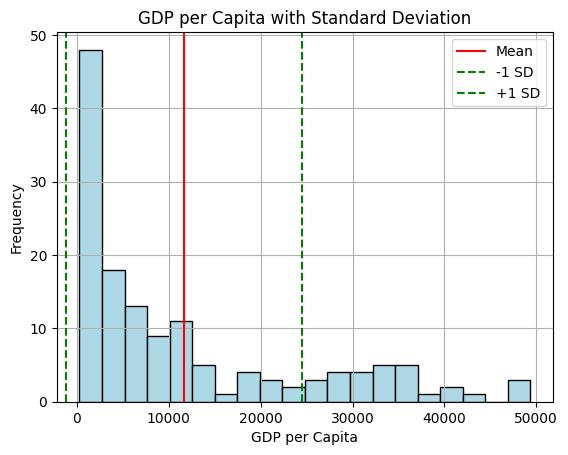

In [ ]:
# И конечно же граифик

import matplotlib.pyplot as plt

mu = mean(gdp_list)
sigma = std_dev(gdp_list)

plt.hist(gdp_list, bins=20, color='lightblue', edgecolor='black')
plt.axvline(mu, color='red', linestyle='solid', label='Mean')
plt.axvline(mu - sigma, color='green', linestyle='dashed', label='-1 SD')
plt.axvline(mu + sigma, color='green', linestyle='dashed', label='+1 SD')
plt.title("GDP по столицам со стандартным отклонением")
plt.xlabel("GDP по столицам")
plt.ylabel("Частота")
plt.legend()
plt.grid(True)
plt.show()


## Дисперсия

In [7]:
# Т.к. у нас уже есть функция для вычисления среднего, то мы можем использовать её для вычисления дисперсии.
# У нас есть только выборка (не генеральная совокупность), поэтому мы будем использовать формулу с 1/(N - 1)

def sample_dispersion(data):
    mu = mean(data)
    return sum((x - mu) ** 2 for x in data) / (len(data) - 1)

In [8]:
print("Дисперсия выборки:", sample_dispersion(gdp_list))

Дисперсия выборки: 165377988.3224286


## Размах (диапазон или range)

In [9]:
# Вариант №1 - не заморачиваемя и используем встроенные функции

gdp_range = max(gdp_list) - min(gdp_list)
print("GDP Range:", gdp_range)


GDP Range: 49079.638311300005


In [10]:
# Вариант №2 - ХАРДКОД для поиска наибольшего и наименьшего значений в данных с помощью цикла 😈

def data_range(values):
    minimum = values[0]
    maximum = values[0]
    for val in values[1:]:
        if val < minimum:
            minimum = val
        if val > maximum:
            maximum = val
    return maximum - minimum


In [13]:
print("Manual GDP Range:", data_range(gdp_list))

Manual GDP Range: 49079.638311300005


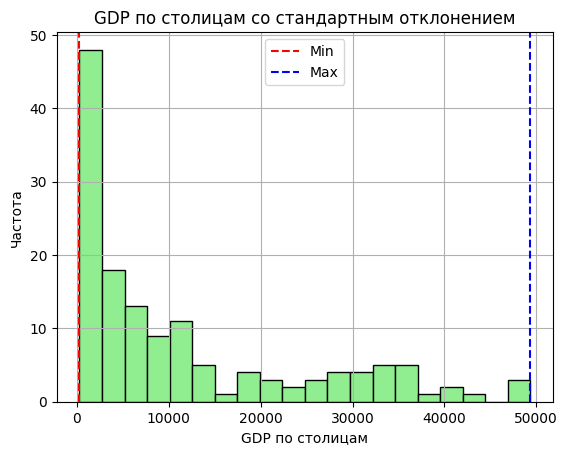

In [17]:
import matplotlib.pyplot as plt

plt.hist(gdp_list, bins=20, color='lightgreen', edgecolor='black')
plt.axvline(min(gdp_list), color='red', linestyle='dashed', label='Min')
plt.axvline(max(gdp_list), color='blue', linestyle='dashed', label='Max')
plt.title("GDP по столицам со стандартным отклонением")
plt.xlabel("GDP по столицам")
plt.ylabel("Частота")
plt.legend()
plt.grid(True)
plt.show()


## Межквартильный размах (Interquartile range или IQR)

In [14]:
# Тут мы всё же используем модуль math, чтобы найти квартили.
# Небольшая ремарка по названию функции - percentile.
# Процентили делят упорядоченные данные на сто равных частей.
# Квартили — это процентили, которые делят набор данных на четверти.
# Первый квартиль, Q1, равен 25-ому процентилю, третий квартиль, Q3, равен 75-ому процентилю.
import math

def percentile(values, p):
    sorted_vals = sorted(values)
    k = (len(sorted_vals) - 1) * (p / 100)
    f = math.floor(k)
    c = math.ceil(k)
    if f == c:
        return sorted_vals[int(k)]
    return sorted_vals[f] + (sorted_vals[c] - sorted_vals[f]) * (k - f)


In [15]:
q1 = percentile(gdp_list, 25)
q3 = percentile(gdp_list, 75)
iqr = q3 - q1

print(f"Q1 (25-й процентиль): {q1}")
print(f"Q3 (75-й процентиль): {q3}")
print(f"IQR: {iqr}")


Q1 (25-й процентиль): 1624.84224775
Q3 (75-й процентиль): 18008.835639999998
IQR: 16383.993392249997


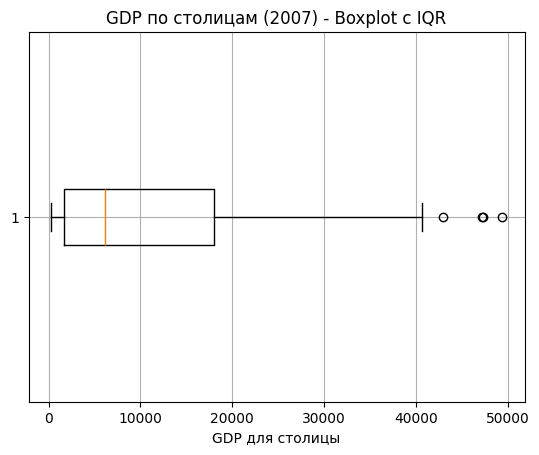

In [19]:
import matplotlib.pyplot as plt

plt.boxplot(gdp_list, vert=False)
plt.title("GDP по столицам (2007) - Boxplot с IQR")
plt.xlabel("GDP для столицы")
plt.grid(True)
plt.show()
